<a href="https://colab.research.google.com/github/ManojKumarKolli/ManojKumar_INFO5731_Spring2024/blob/main/Assignments/Kolli_ManojKumar_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [14]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from collections import defaultdict
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
# Function to generate n-grams
def generate_ngrams(text, n):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.lower().split()  # Tokenize and convert to lower case
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to count n-grams in a list of texts
def count_ngrams(texts, n):
    ngram_counts = defaultdict(int)
    for text in texts:
        for ngram in generate_ngrams(text, n):
            ngram_counts[ngram] += 1
    return ngram_counts

# Noun Phrase Extraction Function
def extract_noun_phrases(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    noun_phrases = []
    for word, tag in tagged:
        if word.lower() not in stop_words and 'NN' in tag and word.isalpha():
            noun_phrases.append(word.lower())  # Collect nouns
    return noun_phrases

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Load the dataset
file_path = '/content/drive/MyDrive/5731/imdb_reviews_cleaned.csv'
data = pd.read_csv(file_path).dropna(subset=['Clean_Review'])

# Process the data for N-gram analysis
data['Noun_Phrases'] = data['Clean_Review'].apply(extract_noun_phrases)

# Question 1 (1): Count the frequency of all the N-grams (N=3).
trigram_counts = count_ngrams(data['Clean_Review'], 3)

# Question 1 (2): Calculate the probabilities for all the bigrams.
bigram_counts = count_ngrams(data['Clean_Review'], 2)
unigram_counts = count_ngrams(data['Clean_Review'], 1)
bigram_probabilities = {bigram: count / unigram_counts[bigram.split()[0]] for bigram, count in bigram_counts.items()}

# Print some results for verification
print("Sample Trigram Counts:")
print(list(trigram_counts.items())[:5])
print("\nSample Bigram Probabilities:")
print(list(bigram_probabilities.items())[:5])

Sample Trigram Counts:
[('infin war amaz', 3), ('war amaz nope', 1), ('amaz nope hollyweird', 1), ('nope hollyweird doesnt', 1), ('hollyweird doesnt know', 1)]

Sample Bigram Probabilities:
[('infin war', 0.8252595155709342), ('war amaz', 0.005639097744360902), ('amaz nope', 0.007633587786259542), ('nope hollyweird', 1.0), ('hollyweird doesnt', 1.0)]


In [18]:
# Question 1 (3): Extract all the noun phrases and calculate the relative probabilities.
noun_phrase_frequencies = defaultdict(lambda: [0] * len(data))
max_frequencies = defaultdict(int)

# Reset the index of data to ensure continuous indexing
data.reset_index(drop=True, inplace=True)

# Reinitialize to correct previous issue
noun_phrase_frequencies = defaultdict(lambda: [0] * len(data))
max_frequencies = defaultdict(int)

# Use a continuous counter for indexing instead of DataFrame's index
for index, row in data.iterrows():
    for phrase in row['Noun_Phrases']:
        # Increment the counter for the phrase by 1
        noun_phrase_frequencies[phrase][index] += 1
        # Update max frequency if current frequency is higher
        max_frequencies[phrase] = max(max_frequencies[phrase], noun_phrase_frequencies[phrase][index])

# Proceed to calculate relative probabilities
relative_probabilities_df = pd.DataFrame()

for phrase, frequencies in noun_phrase_frequencies.items():
    relative_probabilities_df[phrase] = [freq / max_frequencies[phrase] if max_frequencies[phrase] > 0 else 0 for freq in frequencies]

print("\nRelative Probabilities DataFrame:")
print(relative_probabilities_df.head(100))


Relative Probabilities DataFrame:
      war  hollyweird  doesnt  anymor  paint  number  submit  committe  \
0   0.125         1.0    0.25     0.5    1.0     0.5     1.0       1.0   
1   0.000         0.0    0.00     0.0    0.0     0.0     0.0       0.0   
2   0.000         0.0    0.00     0.0    0.0     0.0     0.0       0.0   
3   0.125         0.0    0.00     0.0    0.0     0.0     0.0       0.0   
4   0.000         0.0    0.00     0.0    0.0     0.0     0.0       0.0   
..    ...         ...     ...     ...    ...     ...     ...       ...   
95  0.125         0.0    0.25     0.0    0.0     0.0     0.0       0.0   
96  0.000         0.0    0.00     0.0    0.0     0.0     0.0       0.0   
97  0.000         0.0    0.00     0.0    0.0     0.0     0.0       0.0   
98  0.000         0.0    0.00     0.0    0.0     0.0     0.0       0.0   
99  0.250         0.0    0.00     0.0    0.0     0.0     0.0       0.0   

      robert  downey  ...  tldr  spmeth  rob  semiseri  recip  gat  spectrum

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [19]:
import math
import re
from collections import defaultdict

# Splitting text into words while making them lowercase
def split_into_words(text):
    return re.findall(r'\b\w+\b', text.lower())

# Calculating frequency of each term within a document
def calculate_term_frequency(words):
    term_freq = defaultdict(int)
    for word in words:
        term_freq[word] += 1
    total_words = len(words)
    for term in term_freq:
        term_freq[term] /= total_words
    return term_freq

# Determining the importance of a term across a collection of documents
def calculate_inverse_document_frequency(all_documents):
    inverse_df = defaultdict(lambda: 0)
    num_documents = len(all_documents)
    for document in all_documents:
        unique_terms = set(document)
        for term in unique_terms:
            inverse_df[term] += 1
    for term in inverse_df:
        inverse_df[term] = math.log(num_documents / inverse_df[term])
    return inverse_df

# Processing each document to extract tokens
processed_docs = [split_into_words(review) for review in data['Clean_Review']]
term_frequencies = [calculate_term_frequency(doc) for doc in processed_docs]

# Calculating IDF for all documents
idf_values = calculate_inverse_document_frequency(processed_docs)

# Computing TF-IDF scores for each document
tf_idf_scores = []
tf_idf_matrix = []

for term_freq in term_frequencies:
    document_scores = {}
    doc_matrix = []
    for term, freq in term_freq.items():
        tf_idf_score = freq * idf_values[term]
        document_scores[term] = tf_idf_score
        doc_matrix.append(tf_idf_score)
    tf_idf_scores.append(document_scores)
    tf_idf_matrix.append(doc_matrix)

# Converting the TF-IDF scores into a DataFrame
tf_idf_df = pd.DataFrame(tf_idf_matrix)
# Filling NaNs with 0
tf_idf_df.fillna(0, inplace=True)

# Printing the DataFrame
print("Documents-Terms Weights (TF * IDF) Matrix:")
print(tf_idf_df)

# Function to calculate the similarity between two documents
def calculate_similarity(document_vector, search_vector):
    intersection = sum(document_vector.get(key, 0) * search_vector.get(key, 0) for key in search_vector)
    magnitude_document = sum(value ** 2 for value in document_vector.values())
    magnitude_search = sum(value ** 2 for value in search_vector.values())
    if magnitude_document == 0 or magnitude_search == 0:
        return 0
    return intersection / (math.sqrt(magnitude_document) * math.sqrt(magnitude_search))

# Crafting a search query
search_query = "A captivating ensemble superhero movie that combines action, humor, and heart. The Avengers features iconic characters teaming up to save the world from an unprecedented threat, showcasing spectacular visual effects and dynamic character interactions."
search_words = split_into_words(search_query)
search_term_freq = calculate_term_frequency(search_words)
search_tf_idf = {word: search_term_freq.get(word, 0) * idf_values.get(word, 0) for word in search_words}

# Finding similarity scores for each document against the search query
similarity_scores = [calculate_similarity(doc_score, search_tf_idf) for doc_score in tf_idf_scores]

# Sorting documents based on their similarity to the query
sorted_documents = sorted(enumerate(similarity_scores, 1), key=lambda x: x[1], reverse=True)

# Outputting the most similar documents
print("\n\nMost Similar Documents:")
for doc_number, similarity_score in sorted_documents[:10]:
    print(f"Document {doc_number} has a similarity score of {similarity_score}")


Documents-Terms Weights (TF * IDF) Matrix:
          0         1         2         3         4         5         6    \
0    0.050486  0.054079  0.100285  0.313943  0.313943  0.123505  0.098662   
1    0.288954  0.208126  0.232112  0.173663  0.192597  0.112550  0.045535   
2    0.039934  0.023759  0.043568  0.029378  0.123087  0.047983  0.082500   
3    0.037536  0.019835  0.012387  0.017003  0.029840  0.015025  0.012008   
4    0.038768  0.040783  0.104160  0.147586  0.080523  0.052446  0.058916   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.017143  0.016558  0.040927  0.041462  0.043360  0.053237  0.054856   
995  0.079286  0.072707  0.139832  0.206753  0.154394  0.125242  0.328893   
996  0.196277  0.189876  0.178574  0.116697  0.064314  0.344808  0.213909   
997  0.036751  0.057059  0.087096  0.156945  0.096113  0.093963  0.104388   
998  0.021551  0.007847  0.028302  0.019294  0.070403  0.047277  0.033067   

          7         8         9 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [20]:
# Write your code here

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd

# Load the dataset
# data = pd.read_csv(file_path)

# Preprocess the text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    return tokens

# Tokenize and preprocess the text data
tokenized_data = data['Clean_Review'].apply(preprocess_text).tolist()

# Train Word2Vec model
embedding_size = 300  # Set the embedding size
window_size = 5  # Set the context window size
min_count = 1  # Minimum word frequency threshold
model = Word2Vec(sentences=tokenized_data, vector_size=embedding_size, window=window_size, min_count=min_count)

# Visualize the word embedding model
# we can use dimensionality reduction techniques like t-SNE for visualization







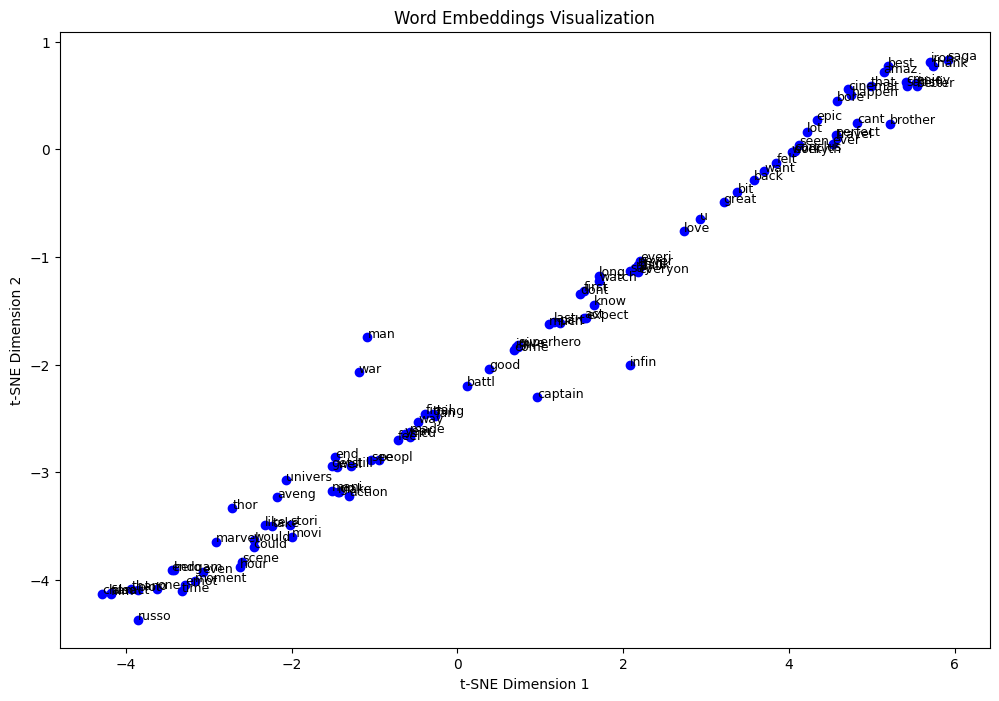

In [21]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to visualize word embeddings using t-SNE
def visualize_embeddings(model, num_words=100):
    words = list(model.wv.index_to_key)[:num_words]
    vectors = np.array([model.wv[word] for word in words])  # Convert to numpy array
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    embeddings_tsne = tsne_model.fit_transform(vectors)
    plt.figure(figsize=(12, 8))
    for i, word in enumerate(words):
        x, y = embeddings_tsne[i, :]
        plt.scatter(x, y, marker='o', color='blue')
        plt.text(x, y, word, fontsize=9)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('Word Embeddings Visualization')
    plt.show()

# Visualize word embeddings
visualize_embeddings(model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [10]:
# The github link of your final csv file
# Link:
https://github.com/ManojKumarKolli/ManojKumar_INFO5731_Spring2024/blob/main/Assignments/imdb_reviews_sentiment_annotated.csv




# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer


# It is fun to work on this assignment. It took some longer time, but learnt a lot of concepts. When deling with N-grams, it is a fun task.